# Friday Week 1 lecture notebook

I'm going to try to have one or two notebooks a week during lecture to show you things

## Part 1 - In which I learn not to copy/paste other people's lecture notes without double checking them
I had slides showing an empirical Bayes estimate of whether a particular coin was fair or biased slightly towards heads.  But some details on that slide where wrong. Thanks Stanford CSE.

In [16]:
def binom_bayes(H, N, p_B, pH_B):
    '''
    calculates posterior of a coin being biased per my slides on Wed
    p(B|flips) = p(flips|B)p(B) / (p(flips|B)p(B) + p(flips|notB)p(notB))
    H=number heads seen in...
    N=number of flips
    p_B=prior on a biased coin
    pH_B=prob of heads a biased coin will have... fair coins are 0.5
    '''
    p_notB = 1. - p_B
    T = N - H
    pT_B = 1. - pH_B
    
    return (pH_B**H * pT_B**T * p_B)/ ( (pH_B**H * pT_B**T * p_B) + (0.5**N * p_notB))


In [17]:
# experiment 1... 33 heads out of 50 flips
# results match the lecture notes
exp1 = binom_bayes(33, 50, 1/100, .6)
print(exp1)

0.08533690005186821


In [13]:
# This is the erroneous value reported in the slides for the additional flips
# the story in the slides is that the 2nd experiment is conducted after the first,
# so we have to take our previous posterior and make it the prior here
# but the story also said there were 29 heads in experiment 2, not 33
# yet the math in lecture notes used 33 heads and came up with a posterior of 0.463 
exp2 = binom_bayes(33, 50, exp1, .6)
print(exp2)

0.4628739946844106


In [40]:
# this is the real value for the 29 heads...
exp2 = binom_bayes(29, 50, exp1, .6)
print(exp2)

0.14546297068974032


In [43]:
# note you can get to the same place if you lump together the two experiments into one
binom_bayes(33+29, 100, 1/100, 0.6)

0.14546297068974032

So the described experiment 2 would NOT have made it so clear the coin was biased... but its definitely upping the probability!

# Lets look at Beta distribution shape

Beta is the conjugate prior for a binomial likelihood distribution. That means we can start with a Beta prior, integrate a binomial likelihood, and end up with a beta posterior.

Beta is parameterized by a,b. When a Beta(a,b) prior is integrated with a binomial likelihood it can be interpreted as adding a-1 heads and b-1 tails to the empirical dataset. 

So let's explore different Betas.


In [50]:
from scipy.stats import beta, binom
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [32]:
# hey what functions does beta provide? how are they parameterized
beta?

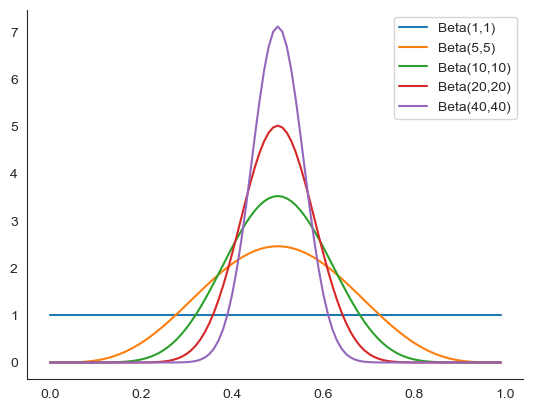

In [39]:
params = [ [1,1], [5,5], [10,10], [20,20], [40,40]]
xvs = np.arange(0,1,0.01)
for p in params:
    plt.plot(xvs, beta.pdf(x=xvs, a=p[0], b=p[1]), label=f'Beta({p[0]},{p[1]})' )
sns.despine()
plt.legend();

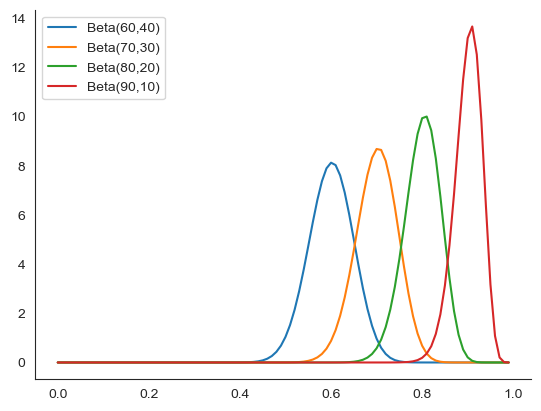

In [44]:
params = [ [60,40], [70,30], [80,20], [90,10]]
xvs = np.arange(0,1,0.01)
for p in params:
    plt.plot(xvs, beta.pdf(x=xvs, a=p[0], b=p[1]), label=f'Beta({p[0]},{p[1]})' )
sns.despine()
plt.legend();

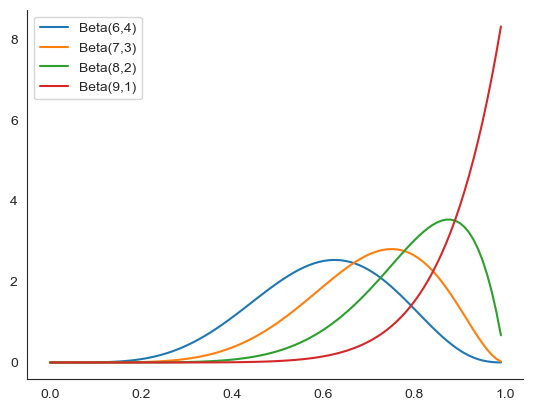

In [49]:
params = [ [6,4], [7,3], [8,2], [9,1]]
xvs = np.arange(0,1,0.01)
for p in params:
    plt.plot(xvs, beta.pdf(x=xvs, a=p[0], b=p[1]), label=f'Beta({p[0]},{p[1]})' )
sns.despine()
plt.legend();

So larger params lead to sharper shapes, and smaller params lead to higher variability. 


Some questions for you to explore in code or ponder theoretically... 
- why is one of the lines in the last plot so very different than the others?
- what happens if a<b?
- what happens when one of a or b are equal to 1? when one is >0 but <1?

Here's a really good question... 
- how would you use the Beta distribution to show you MAP for prior that reflects a moderate belief in a fair coin, and then adds on an experiment of 50 coin flips where 33 of them turn up heads?

OK next lets look at the binomial likelihood function. We are flipping 3 coins, and got all heads. What would that look like if we had a fair coin? What about a biased coin?



In [51]:
binom?

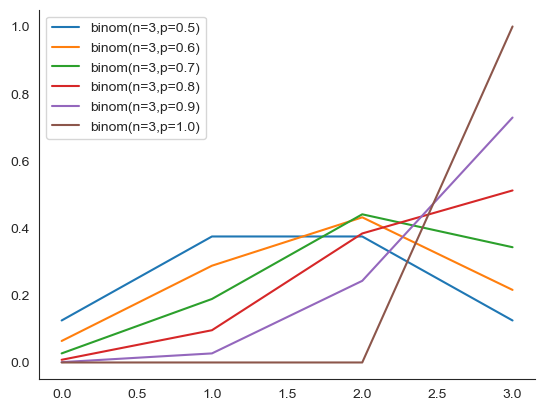

In [61]:
k = range(4)
n = 3
pvals = [0.5, 0.6, 0.7, 0.8, 0.9, 1.] 
for p in pvals:
    plt.plot(k, binom.pmf(k,n,p), label=f'binom(n=3,p={p})')
sns.despine()
plt.legend();

You can easily see how MLE will take p=1. And yet under more fair coins 3 heads isn't very unlikely.  And if you want to see MLE in action you can... take a look at the help and figure it out for yourself how to fit HHH with a binomial